In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Data Preprocessing

**Import data**

In [32]:
data=pd.read_csv("D:/bri-data-hackathon-pa/train.csv")

In [33]:
pd.set_option('max_columns', None)

Correcting data type

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [35]:
data["age"]=2021-data["age"]
data["year_graduated"]=2021-data["year_graduated"]

**Ubah kategorik ke numerik**

variabel ordinal

In [36]:
data['job_level'].value_counts()

JG04    10413
JG05      704
JG03       36
Name: job_level, dtype: int64

In [37]:
data[['job_level', 'Best Performance']].groupby(['job_level'], as_index=False).mean().sort_values(by='Best Performance', ascending=False)


,job_level,Best Performance
0,JG03,0.222222
2,JG05,0.150568
1,JG04,0.146259


In [38]:
map_education = {"JG04" : 1, "JG05": 2, "JG03": 3}
    
data['job_level'] = data['job_level'].map(map_education)
data['job_level'].value_counts()

1    10413
2      704
3       36
Name: job_level, dtype: int64

In [39]:
data['person_level'].value_counts()

PG03    9655
PG04     757
PG06     378
PG05     308
PG01      19
PG07      19
PG02      16
PG08       1
Name: person_level, dtype: int64

In [40]:
data[['person_level', 'Best Performance']].groupby(['person_level'], as_index=False).mean().sort_values(by='Best Performance', ascending=False)


,person_level,Best Performance
7,PG08,1.000000
0,PG01,0.263158
5,PG06,0.187831
1,PG02,0.187500
2,PG03,0.147281
3,PG04,0.133421
6,PG07,0.105263
4,PG05,0.103896


buang var PG08

In [41]:
map_education = {"PG07" : 1, "PG05": 2,"PG04": 4, "PG03": 3, "PG06": 5, "PG02": 6, "PG01": 7, "PG08": 8}
    
data['person_level'] = data['person_level'].map(map_education)
data['person_level'].value_counts()

3    9655
4     757
5     378
2     308
7      19
1      19
6      16
8       1
Name: person_level, dtype: int64

In [42]:
data['Education_level'].value_counts()

level_4    9222
level_3    1743
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64

In [43]:
data[['Education_level', 'Best Performance']].groupby(['Education_level'], as_index=False).mean().sort_values(by='Best Performance', ascending=False)


,Education_level,Best Performance
1,level_1,0.192857
3,level_3,0.150316
4,level_4,0.145522
5,level_5,0.139535
0,level_0,0.000000
2,level_2,0.000000


In [44]:
map_education = {"level_2" : 1, "level_0": 2, "level_5": 3, "level_4": 3, "level_3": 4, "level_1": 6}
    
data['Education_level'] = data['Education_level'].map(map_education)
data['Education_level'].value_counts()

3    9265
4    1743
6     140
1       4
2       1
Name: Education_level, dtype: int64

Variabel non Ordinal

Employee_type
marital_status_maried(Y/N)

In [45]:
data = pd.concat([data,pd.get_dummies(data['Employee_type']),
                     pd.get_dummies(data['marital_status_maried(Y/N)']),
                     pd.get_dummies(data['gender'])], axis=1)
data.drop(['Employee_type','marital_status_maried(Y/N)','gender'], axis = 1,inplace=True)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2
0,1,1.352775,3,1.352775,1.732051,36,1,2,2.86,10,4,2,3,2,3,0,46.37,0.0,0,1,0,0,0,1,0,1
1,1,1.292285,3,1.292285,1.039230,32,0,6,7.28,14,4,4,3,0,0,1,47.68,0.0,0,1,0,0,0,1,0,1
2,2,2.565151,5,2.308679,1.780449,51,1,6,0.00,32,28,10,9,6,2,1,40.73,0.0,0,0,0,1,0,1,1,0
3,2,2.828427,5,1.000000,1.385641,54,2,6,0.00,34,29,11,6,0,4,10,47.42,0.0,1,1,0,0,0,1,0,1
4,2,2.828427,5,2.828427,0.707107,56,3,6,7.20,36,30,9,8,2,3,0,47.18,0.0,0,1,0,0,0,1,0,1


Cleaning NA

In [46]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

In [47]:
rows_with_NaN

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2
1882,1,1.292285,3,1.292285,0.911043,30,0,4,2.88,9,5,4,5,0,1,15,NaN,NaN,0,1,0,0,1,0,1,0


In [48]:
data = data[data['Last_achievement_%'].notnull()]

In [49]:
data.shape

(11152, 26)

In [50]:
data=data.reset_index(drop=True)

In [51]:
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2
0,1,1.352775,3,1.352775,1.732051,36,1,2,2.86,10,4,2,3,2,3,0,46.37,0.0,0,1,0,0,0,1,0,1
1,1,1.292285,3,1.292285,1.039230,32,0,6,7.28,14,4,4,3,0,0,1,47.68,0.0,0,1,0,0,0,1,0,1
2,2,2.565151,5,2.308679,1.780449,51,1,6,0.00,32,28,10,9,6,2,1,40.73,0.0,0,0,0,1,0,1,1,0
3,2,2.828427,5,1.000000,1.385641,54,2,6,0.00,34,29,11,6,0,4,10,47.42,0.0,1,1,0,0,0,1,0,1
4,2,2.828427,5,2.828427,0.707107,56,3,6,7.20,36,30,9,8,2,3,0,47.18,0.0,0,1,0,0,0,1,0,1


Feature Engineering

Duplicate rows

In [15]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]

In [16]:
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [job_level, job_duration_in_current_job_level, person_level, job_duration_in_current_person_level, job_duration_in_current_branch, Employee_type, gender, age, marital_status_maried(Y/N), number_of_dependences, Education_level, GPA, year_graduated, job_duration_from_training, branch_rotation, job_rotation, assign_of_otherposition, annual leave, sick_leaves, Last_achievement_%, Achievement_above_100%_during3quartal, Best Performance]
Index: []


rasio

In [18]:
gpa=data[data['GPA']>4]

In [19]:
gpa.shape

(52, 22)

Feature Engineering

achievement_during_2_quartal

In [112]:
achievement_during_2_quartal=[]
for i in range(len(data)):
    if data["Last_achievement_%"][i]>100:
        data["Achievement_above_100%_during3quartal"][i]=data["Achievement_above_100%_during3quartal"][i]-1

<ipython-input-112-7dad4a31e602>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Achievement_above_100%_during3quartal"][i]=data["Achievement_above_100%_during3quartal"][i]-1


In [113]:
data[data["Last_achievement_%"]>=100]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2
24,2,1.153256,3,1.153256,1.581139,25,0,2,0.00,8,3,1,2,0,2,2,102.38,0.0,0,0,1,0,1,0,1,0
26,2,1.292285,3,1.292285,0.707107,28,0,2,0.00,10,2,2,2,0,6,0,103.87,0.0,0,0,1,0,0,1,0,1
31,2,1.606238,3,1.606238,0.707107,44,2,2,0.00,25,5,4,5,0,4,0,113.03,1.0,0,0,1,0,0,1,0,1
33,2,1.385641,3,1.385641,1.224745,33,2,2,0.00,15,5,3,3,2,3,1,121.61,2.0,0,1,0,0,0,1,0,1
35,2,1.606238,3,1.606238,1.039230,45,2,2,0.00,26,5,3,2,5,10,0,105.86,2.0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11084,2,2.828427,3,1.000000,0.412311,38,3,6,3.34,13,14,8,9,3,5,0,108.19,1.0,0,1,0,0,0,1,1,0
11086,2,1.634013,3,1.634013,0.648074,38,1,6,3.35,10,5,5,3,4,3,0,106.44,0.0,0,1,0,0,0,1,0,1
11088,2,1.658312,3,1.658312,1.224745,33,1,6,3.46,5,6,4,5,0,6,2,103.75,1.0,0,1,0,0,0,1,0,1
11092,3,1.473092,6,0.000000,1.224745,45,3,6,3.27,11,17,8,8,3,5,2,119.74,2.0,0,1,0,0,0,1,1,0


In [114]:
data[data['job_duration_in_current_branch']==0].shape

(254, 26)

total_pindah

In [115]:
data["total_pindah"]=data["job_rotation"]+data["branch_rotation"]+data["assign_of_otherposition"]
data=data.drop(["job_rotation",'branch_rotation',"assign_of_otherposition"],axis=1)

durasi_terlama

In [116]:
durasi_terlama=[]
for i in range(len(data)):
    durasi_terlama.append(max(data['job_duration_in_current_job_level'][i],data['job_duration_in_current_person_level'][i],data['job_duration_in_current_branch'][i]))



In [117]:
durasi_terlama=pd.DataFrame(durasi_terlama)
data= pd.concat([data,durasi_terlama], axis=1)
data.rename(columns={0:'durasi_terlama'}, 
                 inplace=True)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,durasi_terlama
0,2,1.352775,3,1.352775,1.732051,36,1,1,2.86,10,4,3,0,46.37,0.0,0,1,0,0,0,1,0,1,7,1.732051
1,3,2.565151,6,2.308679,1.780449,51,1,2,0.00,32,28,2,1,40.73,0.0,0,0,0,1,0,1,1,0,25,2.565151
2,3,2.828427,6,1.000000,1.385641,54,2,2,0.00,34,29,4,10,47.42,0.0,1,1,0,0,0,1,0,1,17,2.828427
3,3,2.828427,6,2.121320,1.118034,50,3,2,0.00,31,28,0,0,48.46,0.0,0,1,0,0,0,1,1,0,20,2.828427
4,3,2.828427,6,2.345208,2.102380,52,2,2,0.00,33,29,8,0,60.38,0.0,0,1,0,0,0,1,1,0,16,2.828427


efektivitas

In [118]:
data["efektivitas"]=data['Last_achievement_%']/(data["durasi_terlama"]+1)

In [119]:
data=data.drop(["durasi_terlama"],axis=1)

libur

In [120]:
libur=(data["sick_leaves"]+data['annual leave'])/data["job_duration_from_training"]
libur=pd.DataFrame(libur)
data= pd.concat([data,libur], axis=1)
data.rename(columns={0:'libur'}, 
                 inplace=True)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,efektivitas,libur
0,2,1.352775,3,1.352775,1.732051,36,1,1,2.86,10,4,3,0,46.37,0.0,0,1,0,0,0,1,0,1,7,16.972598,0.750000
1,3,2.565151,6,2.308679,1.780449,51,1,2,0.00,32,28,2,1,40.73,0.0,0,0,0,1,0,1,1,0,25,11.424481,0.107143
2,3,2.828427,6,1.000000,1.385641,54,2,2,0.00,34,29,4,10,47.42,0.0,1,1,0,0,0,1,0,1,17,12.386288,0.482759
3,3,2.828427,6,2.121320,1.118034,50,3,2,0.00,31,28,0,0,48.46,0.0,0,1,0,0,0,1,1,0,20,12.657940,0.000000
4,3,2.828427,6,2.345208,2.102380,52,2,2,0.00,33,29,8,0,60.38,0.0,0,1,0,0,0,1,1,0,16,15.771490,0.275862


lama pendidikan

In [121]:
pendidikan=data["GPA"]/(data['age']-data['year_graduated'])

In [122]:
data= pd.concat([data,pendidikan], axis=1)
data.rename(columns={0:'pendidikan'}, 
                 inplace=True)
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,efektivitas,libur,pendidikan
0,2,1.352775,3,1.352775,1.732051,36,1,1,2.86,10,4,3,0,46.37,0.0,0,1,0,0,0,1,0,1,7,16.972598,0.750000,0.11
1,3,2.565151,6,2.308679,1.780449,51,1,2,0.00,32,28,2,1,40.73,0.0,0,0,0,1,0,1,1,0,25,11.424481,0.107143,0.00
2,3,2.828427,6,1.000000,1.385641,54,2,2,0.00,34,29,4,10,47.42,0.0,1,1,0,0,0,1,0,1,17,12.386288,0.482759,0.00
3,3,2.828427,6,2.121320,1.118034,50,3,2,0.00,31,28,0,0,48.46,0.0,0,1,0,0,0,1,1,0,20,12.657940,0.000000,0.00
4,3,2.828427,6,2.345208,2.102380,52,2,2,0.00,33,29,8,0,60.38,0.0,0,1,0,0,0,1,1,0,16,15.771490,0.275862,0.00


In [123]:
data_1=data[data['Best Performance']==1]
data_0=data[data['Best Performance']==0]

In [39]:
data_1.describe(include="all")

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,efektivitas,libur,pendidikan
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.0,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,2.052019,1.431283,3.205745,1.355183,1.051497,35.086180,0.952640,3.850155,3.158455,11.645963,6.296584,3.688665,1.166925,71.810862,0.562888,1.0,0.641304,0.312112,0.046584,0.163043,0.836957,0.277950,0.722050,8.430901,29.362029,1.053904,0.136229
std,0.248562,0.431951,0.690977,0.314245,0.397954,4.623799,0.871776,0.394287,0.237697,3.722771,5.109577,2.719488,2.849380,21.793677,0.951385,0.0,0.479804,0.463535,0.210828,0.369549,0.369549,0.448163,0.448163,5.324866,9.633508,1.007472,0.017071
min,1.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,3.000000,2.090000,2.000000,2.000000,0.000000,0.000000,13.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.036537,0.000000,0.067714
25%,2.000000,1.224745,3.000000,1.224745,0.707107,32.000000,0.000000,4.000000,3.000000,9.000000,4.000000,2.000000,0.000000,57.687500,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,23.039250,0.400000,0.126522
50%,2.000000,1.352775,3.000000,1.322876,1.153256,34.000000,1.000000,4.000000,3.130000,11.000000,5.000000,3.000000,0.000000,70.730000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000,28.780909,0.800000,0.136522
75%,2.000000,1.385641,3.000000,1.385641,1.224745,36.000000,2.000000,4.000000,3.300000,13.000000,6.000000,5.000000,1.000000,86.595000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000,35.773410,1.500000,0.146667
max,3.000000,2.858321,8.000000,2.828427,2.414539,57.000000,3.000000,6.000000,3.910000,35.000000,31.000000,14.000000,55.000000,128.260000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,68.331988,11.666667,0.191579


In [40]:
data_0.describe(include="all")

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,efektivitas,libur,pendidikan
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,2.053902,1.426115,3.208170,1.343255,1.033226,34.988515,0.983947,3.848734,3.161506,11.698643,6.082093,3.668363,1.083921,72.939282,0.570347,0.0,0.661577,0.291699,0.046724,0.146829,0.853171,0.257374,0.742626,8.289611,29.706734,1.034379,0.137039
std,0.237668,0.416560,0.642953,0.308759,0.418591,4.208956,0.873923,0.394731,0.242886,3.526045,4.519943,2.657450,2.636263,23.070002,0.921936,0.0,0.473204,0.454574,0.211061,0.353958,0.353958,0.437216,0.437216,5.029509,10.062669,0.982506,0.016456
min,1.000000,0.000000,1.000000,0.000000,0.000000,26.000000,0.000000,1.000000,2.050000,2.000000,2.000000,0.000000,0.000000,4.510000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.967469,0.000000,0.056250
25%,2.000000,1.224745,3.000000,1.224745,0.707107,32.000000,0.000000,4.000000,3.000000,9.000000,4.000000,2.000000,0.000000,57.132500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,22.661179,0.400000,0.127083
50%,2.000000,1.352775,3.000000,1.352775,1.118034,34.000000,1.000000,4.000000,3.140000,11.000000,5.000000,3.000000,0.000000,72.535000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000,29.208789,0.800000,0.136957
75%,2.000000,1.414214,3.000000,1.385641,1.224745,36.000000,2.000000,4.000000,3.310000,13.000000,6.000000,5.000000,1.000000,89.277500,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000,36.558958,1.400000,0.147273
max,3.000000,2.958040,7.000000,2.828427,2.677686,58.000000,7.000000,6.000000,3.970000,34.000000,33.000000,21.000000,53.000000,130.000000,3.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,74.564756,15.666667,0.216667


In [41]:
data.columns

Index([                            'job_level',
           'job_duration_in_current_job_level',
                                'person_level',
        'job_duration_in_current_person_level',
              'job_duration_in_current_branch',
                                         'age',
                       'number_of_dependences',
                             'Education_level',
                                         'GPA',
                              'year_graduated',
                  'job_duration_from_training',
                                'annual leave',
                                 'sick_leaves',
                          'Last_achievement_%',
       'Achievement_above_100%_during3quartal',
                            'Best Performance',
                                   'RM_type_A',
                                   'RM_type_B',
                                   'RM_type_C',
                                           'N',
                                        

In [ ]:
data[['Education_level', 'Best Performance']].groupby(['Education_level'], as_index=False).mean().sort_values(by='Best Performance', ascending=False)


PCA

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_numerik = data.select_dtypes(include=numerics)

In [9]:
data_numerik.drop(["Best Performance"],axis=1)

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,1.352775,1.352775,1.732051,2,1985,1,2.86,2011,4,2,3,2,3,0,46.37,0.0
1,1.292285,1.292285,1.039230,2,1989,0,7.28,2007,4,4,3,0,0,1,47.68,0.0
2,2.565151,2.308679,1.780449,1,1970,1,0.00,1989,28,10,9,6,2,1,40.73,0.0
3,2.828427,1.000000,1.385641,2,1967,2,0.00,1987,29,11,6,0,4,10,47.42,0.0
4,2.828427,2.828427,0.707107,2,1965,3,7.20,1985,30,9,8,2,3,0,47.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1.256981,1.256981,1.224745,2,1986,1,3.33,2016,4,3,3,0,4,1,50.87,0.0
11149,1.385641,1.385641,1.802776,1,1988,2,3.00,2015,3,1,2,0,6,0,79.91,0.0
11150,1.256981,1.256981,1.385641,2,1991,0,3.48,2017,2,1,2,0,4,0,78.38,0.0
11151,1.118034,1.118034,0.000000,1,1987,1,3.53,2012,5,5,4,0,4,1,85.94,1.0


In [10]:
from sklearn.preprocessing import StandardScaler
df_st =  StandardScaler().fit_transform(data_numerik)  

In [11]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(df_st)
pca.shape

(11152, 5)

In [12]:
pcamodel.explained_variance_ 

array([5.19699478, 1.70866078, 1.1797804 , 1.11977769, 1.01954342])

In [13]:
pcamodel.explained_variance_ratio_

array([0.30567816, 0.10050045, 0.06939262, 0.06586337, 0.05996776])

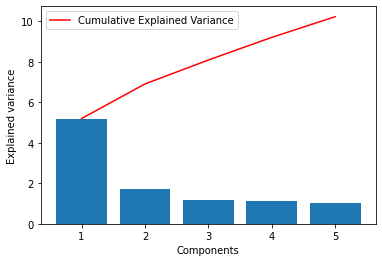

In [14]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

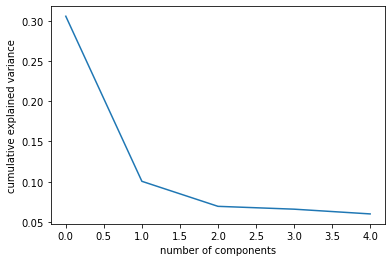

In [15]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

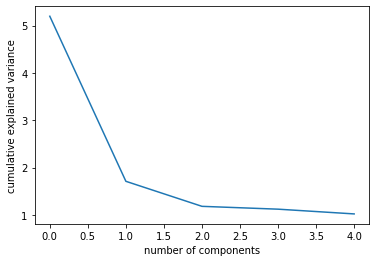

In [16]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

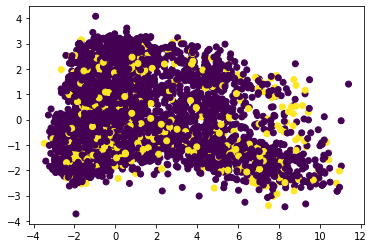

In [19]:
plt.scatter(pca[:, 0], pca[:, 1],c=data["Best Performance"])

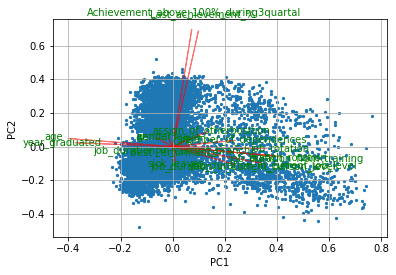

In [23]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(data_numerik.columns))
plt.show()

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [17] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


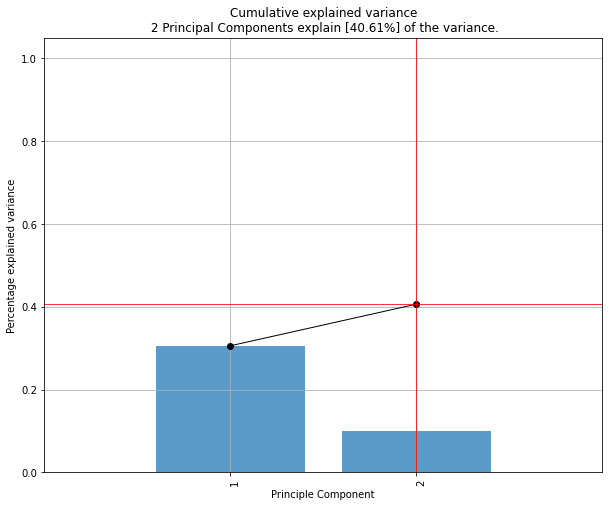

<Figure size 432x288 with 0 Axes>

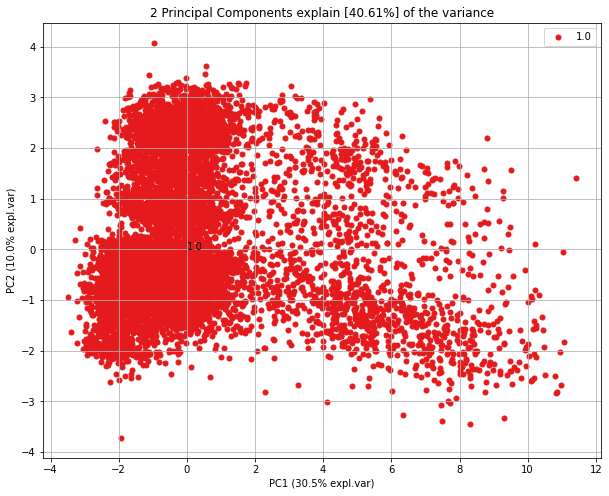

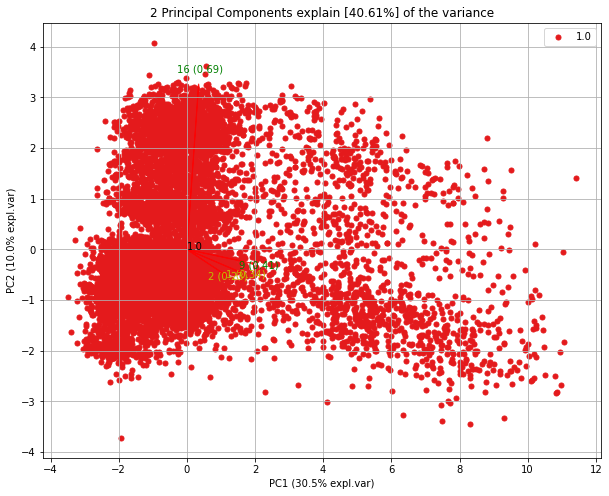

In [92]:
from pca import pca


# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(df_st)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

In [93]:
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_

array([0.30567816, 0.10050045, 0.06939262, 0.06586337, 0.05996777,
       0.05932071, 0.05837915, 0.05614931, 0.05372809, 0.04995685,
       0.04326319, 0.02437367, 0.01557192, 0.01221718, 0.01211278,
       0.00910279, 0.00442198])

In [94]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.30567816, 0.40617861, 0.47557123, 0.5414346 , 0.60140237,
       0.66072308, 0.71910223, 0.77525154, 0.82897964, 0.87893648,
       0.92219968, 0.94657335, 0.96214527, 0.97436245, 0.98647523,
       0.99557802, 1.        ])

In [95]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_numerik.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
variable,,,,,,,,,,,,,,,,,
job_duration_in_current_job_level,0.335494,-0.096362,-0.242536,0.344489,-0.189906,0.132015,0.085973,-0.026748,-0.005024,0.061945,-0.007115,-0.144814,0.041001,0.585698,-0.440748,0.256893,-0.095930
job_duration_in_current_person_level,0.233544,-0.104159,-0.349666,0.535557,-0.291367,0.189983,0.104747,-0.058996,-0.004530,0.113884,0.133582,0.017910,-0.030775,-0.499252,0.214827,-0.250117,-0.004077
job_duration_in_current_branch,-0.001838,-0.020777,0.011241,0.555684,0.626967,-0.273850,-0.213173,0.264646,-0.023484,-0.109285,-0.243400,-0.146063,-0.012689,0.013800,0.031722,-0.096594,-0.057722
gender,-0.060166,0.051993,-0.594633,-0.161546,0.067286,0.024951,-0.091203,-0.147936,0.329187,-0.678657,-0.085034,0.019388,-0.005679,-0.013414,-0.019947,-0.004445,0.038252
age,-0.397984,0.047904,-0.033107,0.067986,-0.060288,0.061729,0.040128,-0.057572,0.021773,0.094475,0.031993,-0.382178,-0.039574,0.075230,-0.349700,-0.474589,0.556769
number_of_dependences,0.236911,0.036592,0.055384,-0.060437,0.213471,-0.059072,-0.131053,0.104570,-0.004633,-0.155796,0.891593,-0.190935,0.018893,0.011179,-0.027939,-0.031375,0.026656
GPA,0.032815,0.023035,0.065876,0.018125,0.433388,0.145902,0.857979,-0.195493,0.056587,-0.064012,0.038591,0.033127,-0.003385,-0.011775,-0.006486,-0.009530,-0.009798
year_graduated,-0.369950,0.022710,-0.078892,0.081721,-0.083868,0.071947,0.060507,-0.076846,0.057116,0.062400,0.058313,-0.636786,-0.049715,0.095155,0.485436,0.374780,-0.155741
job_duration_from_training,0.413230,-0.059435,0.037806,-0.031571,0.029154,-0.029603,0.000797,0.020498,-0.044395,-0.045152,-0.138984,-0.021932,0.004248,0.079418,0.361073,0.272240,0.765843


In [111]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data_numerik.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [113]:
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data_numerik.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [96]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

In [97]:
pca_scores = PCA().fit_transform(df_st)

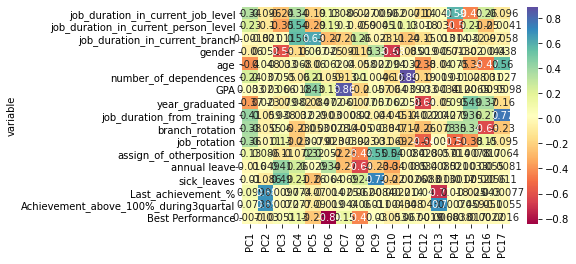

In [98]:
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [99]:
pca_scores = PCA().fit_transform(df_st)

In [105]:
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data_numerik.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [106]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data_numerik.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [107]:
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=data_numerik.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [108]:
data_numerik.columns.values

array(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'gender', 'age',
       'number_of_dependences', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'Best Performance'], dtype=object)

In [109]:
pca_out.explained_variance_ratio_[0]*100, 2

(30.567816262671542, 2)

Korelasi

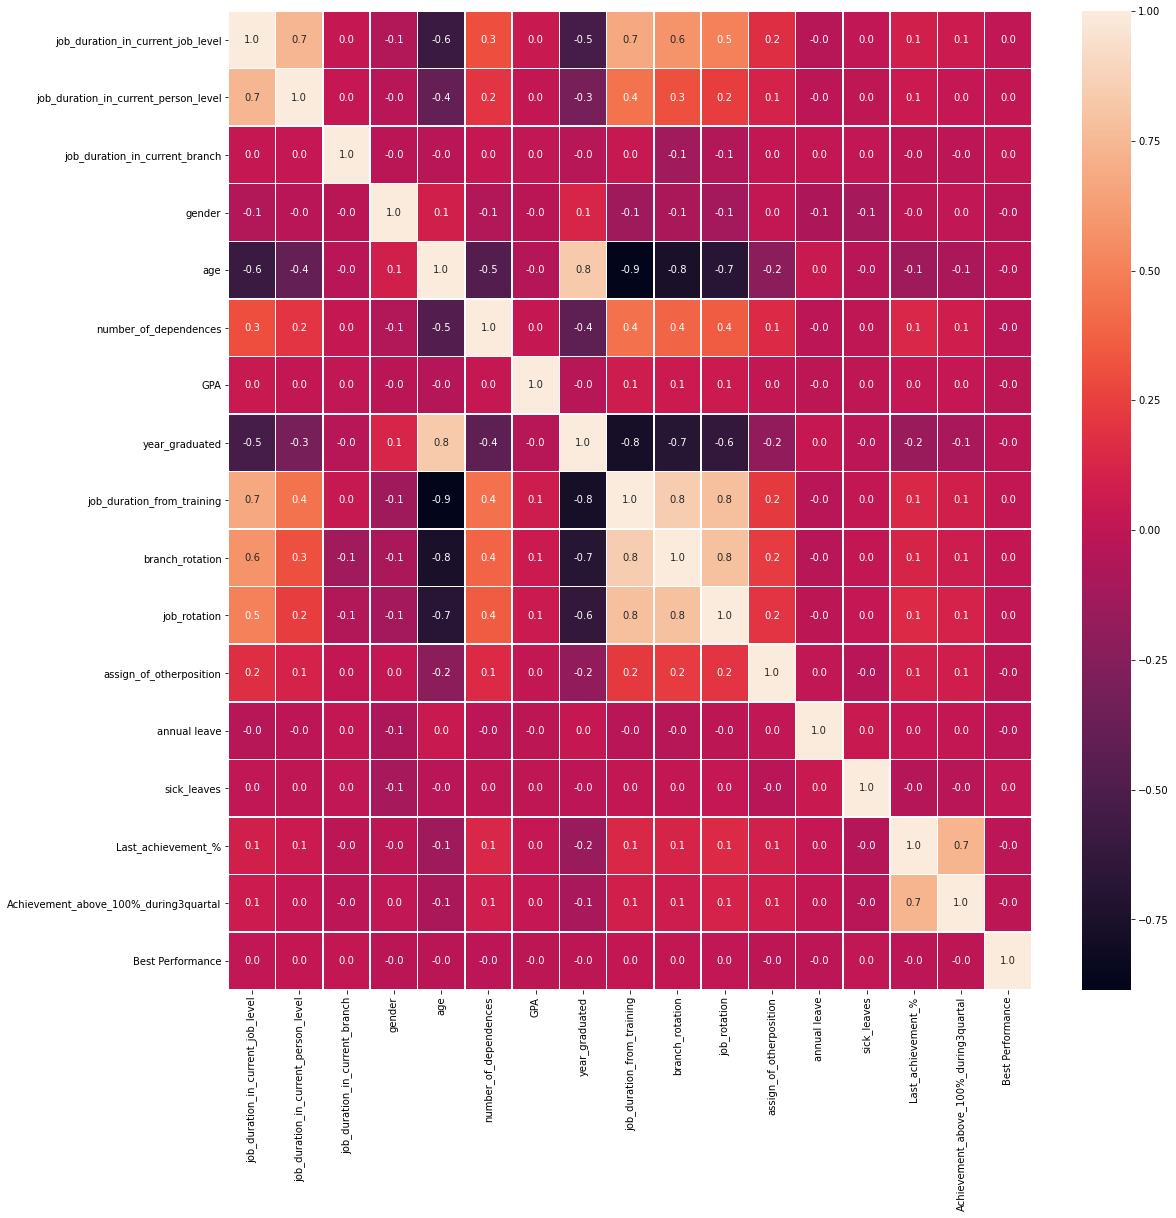

In [272]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_numerik.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Multikolinearitas

In [32]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
X = data_numerik.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,job_duration_in_current_job_level,41.563387
1,job_duration_in_current_person_level,43.525807
2,job_duration_in_current_branch,7.970815
3,gender,17.394056
4,age,728578.059446
5,number_of_dependences,2.843872
6,GPA,1.063306
7,year_graduated,729439.183104
8,job_duration_from_training,15.229320
9,branch_rotation,16.068947


In [81]:
X = X.drop(['age'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_job_level,41.148431
1,job_duration_in_current_person_level,43.230226
2,job_duration_in_current_branch,7.946070
3,gender,17.216599
4,number_of_dependences,2.840463
5,GPA,1.063263
6,year_graduated,67.420787
7,job_duration_from_training,14.017971
8,branch_rotation,16.013755
9,job_rotation,14.762589


In [82]:
X = X.drop(['year_graduated'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_job_level,40.987122
1,job_duration_in_current_person_level,38.022105
2,job_duration_in_current_branch,6.902750
3,gender,12.806126
4,number_of_dependences,2.838824
5,GPA,1.062390
6,job_duration_from_training,12.577052
7,branch_rotation,15.713225
8,job_rotation,13.929116
9,assign_of_otherposition,1.301907


#### X = X.drop(['job_duration_in_current_job_level'],axis=1)
calc_vif(X)

In [84]:
X = X.drop(['Last_achievement_%'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_person_level,15.276517
1,job_duration_in_current_branch,6.572885
2,gender,11.642036
3,number_of_dependences,2.820203
4,GPA,1.061822
5,job_duration_from_training,11.785649
6,branch_rotation,15.316435
7,job_rotation,13.611504
8,assign_of_otherposition,1.301667
9,annual leave,2.794890


In [85]:
X = X.drop(['branch_rotation'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_person_level,15.249510
1,job_duration_in_current_branch,6.233791
2,gender,11.262748
3,number_of_dependences,2.814792
4,GPA,1.061819
5,job_duration_from_training,7.867690
6,job_rotation,11.092236
7,assign_of_otherposition,1.295710
8,annual leave,2.793976
9,sick_leaves,1.170285


In [86]:
X = X.drop(['job_duration_in_current_person_level'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_branch,5.732446
1,gender,7.325466
2,number_of_dependences,2.802942
3,GPA,1.061770
4,job_duration_from_training,7.195243
5,job_rotation,11.076990
6,assign_of_otherposition,1.295697
7,annual leave,2.708565
8,sick_leaves,1.163752
9,Achievement_above_100%_during3quartal,1.401356


In [87]:
X = X.drop(['job_rotation'],axis=1)
calc_vif(X)

,variables,VIF
0,job_duration_in_current_branch,5.731593
1,gender,6.325299
2,number_of_dependences,2.792906
3,GPA,1.061606
4,job_duration_from_training,3.150232
5,assign_of_otherposition,1.294505
6,annual leave,2.668220
7,sick_leaves,1.159792
8,Achievement_above_100%_during3quartal,1.391673


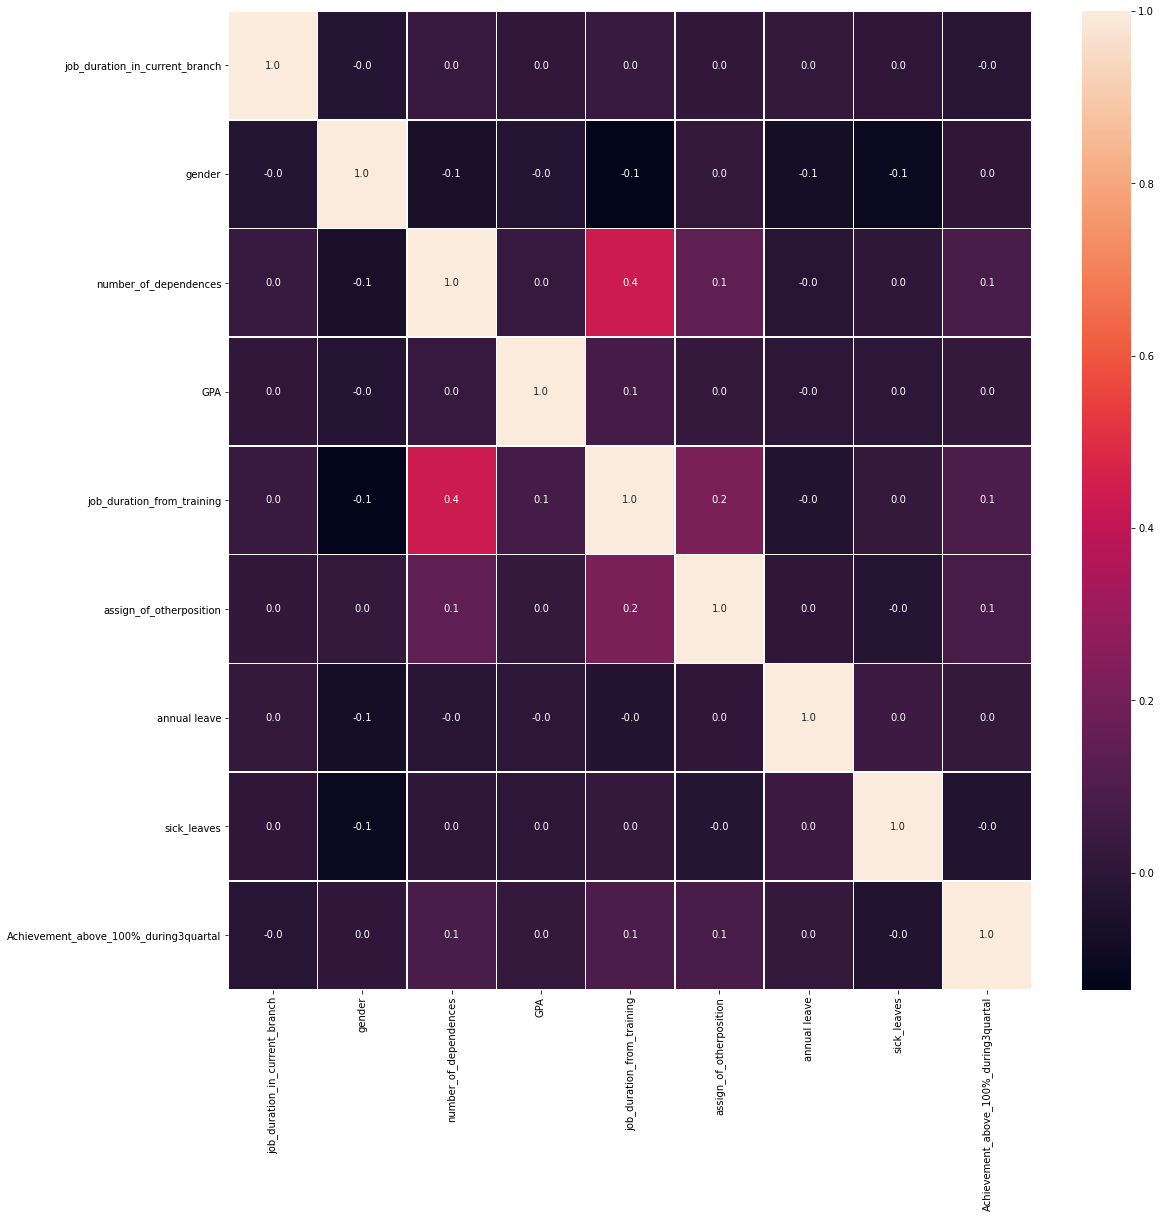

In [273]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

yang dipake Job Duration From Training,Age,Last_achievment_% (masih make feeling)

# Model

Pilih variabel

In [125]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(data)
data[data.columns[sel.get_support(indices=True)]] 

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,N,Y,1,2,total_pindah,efektivitas,libur
0,2,1.352775,3,1.352775,1.732051,36,1,1,2.86,10,4,3,0,46.37,0.0,0,1,0,0,1,0,1,7,16.972598,0.750000
1,3,2.565151,6,2.308679,1.780449,51,1,2,0.00,32,28,2,1,40.73,0.0,0,0,0,0,1,1,0,25,11.424481,0.107143
2,3,2.828427,6,1.000000,1.385641,54,2,2,0.00,34,29,4,10,47.42,0.0,1,1,0,0,1,0,1,17,12.386288,0.482759
3,3,2.828427,6,2.121320,1.118034,50,3,2,0.00,31,28,0,0,48.46,0.0,0,1,0,0,1,1,0,20,12.657940,0.000000
4,3,2.828427,6,2.345208,2.102380,52,2,2,0.00,33,29,8,0,60.38,0.0,0,1,0,0,1,1,0,16,15.771490,0.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,2,1.256981,3,1.256981,1.224745,35,1,6,3.33,5,4,4,1,50.87,0.0,0,1,0,0,1,0,1,6,22.538963,1.250000
11096,2,1.385641,3,1.385641,1.802776,33,2,6,3.00,6,3,6,0,79.91,0.0,0,0,1,0,1,1,0,3,28.511023,2.000000
11097,2,1.256981,3,1.256981,1.385641,30,0,6,3.48,4,2,4,0,78.38,0.0,0,0,1,0,1,0,1,3,32.854906,2.000000
11098,2,1.118034,3,1.118034,0.000000,34,1,6,3.53,9,5,4,1,85.94,1.0,0,1,0,0,1,1,0,9,40.575364,1.000000


Splitting

In [26]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2)

ini yg aman dari multikol

In [146]:
X_train=df_train[['job_duration_in_current_branch','gender','number_of_dependences',
                 'GPA','job_duration_from_training','assign_of_otherposition',
                 'annual leave','sick_leaves','Achievement_above_100%_during3quartal']]
y_train=df_train["Best Performance"]

KeyError: "['assign_of_otherposition'] not in index"

In [75]:
X_test=df_test[['job_duration_in_current_branch','gender','number_of_dependences',
                 'GPA','job_duration_from_training','assign_of_otherposition',
                 'annual leave','sick_leaves','Achievement_above_100%_during3quartal']]
y_test=df_test["Best Performance"]

pake semua blom make feature baru

In [27]:
X_train=df_train.drop(["Best Performance"],axis=1)
y_train=df_train["Best Performance"]

In [71]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2,total_pindah,efektivitas,libur,pendidikan
5373,2,2.828427,4,1.414214,0.707107,41,2,4,3.19,18,15,0,0,58.61,0.0,1,0,0,0,1,0,1,12,15.309159,0.000000,0.138696
5264,2,1.385641,3,1.385641,1.224745,34,2,4,3.26,10,6,4,0,112.65,2.0,0,0,1,0,1,0,1,11,47.220020,0.666667,0.135833
4628,2,1.224745,3,1.224745,0.707107,31,1,4,3.49,9,3,3,5,63.91,0.0,0,1,0,0,1,0,1,5,28.726889,2.666667,0.158636
2212,2,1.322876,3,1.322876,0.707107,33,0,4,3.22,9,5,4,0,82.26,1.0,0,1,0,0,1,0,1,5,35.413002,0.800000,0.134167
3641,2,1.224745,3,1.224745,0.707107,36,2,4,3.24,11,5,3,0,54.65,0.0,0,1,0,0,1,0,1,8,24.564614,0.600000,0.129600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,2,1.153256,3,1.153256,1.191638,32,0,4,2.78,8,5,6,4,51.56,0.0,1,0,0,1,0,0,1,5,23.525788,2.000000,0.115833
1393,2,1.224745,3,1.224745,1.224745,31,1,3,3.15,10,3,4,1,53.14,0.0,0,1,0,0,1,0,1,4,23.885885,1.666667,0.150000
6124,2,1.153256,3,1.153256,1.224745,36,1,4,3.14,13,5,3,1,88.38,3.0,1,0,0,0,1,0,1,6,39.725903,0.800000,0.136522
3610,2,1.224745,3,1.224745,0.648074,35,1,4,3.08,13,5,3,0,100.12,2.0,1,0,0,0,1,0,1,5,45.002913,0.600000,0.140000


In [28]:
X_test=df_test.drop(["Best Performance"],axis=1)
y_test=df_test["Best Performance"]

remove outlier

In [63]:
df_train_tekanan=df_train[df_train["Best Performance"]==1]
df_train_tidak_tekanan=df_train[df_train["Best Performance"]==0]

In [64]:
X_train_tekanan=df_train_tekanan.drop(["Best Performance"],axis=1)
X_train_tidak_tekanan=df_train_tidak_tekanan.drop(["Best Performance"],axis=1)
y_train_tekanan=df_train_tekanan["Best Performance"]
y_train_tidak_tekanan=df_train_tidak_tekanan["Best Performance"]

In [65]:
from sklearn.ensemble import IsolationForest
Iso1=IsolationForest()
Iso2=IsolationForest()
Iso1.fit(X_train_tidak_tekanan)
Iso2.fit(X_train_tekanan)
y_Iso1= Iso1.predict(X_train_tidak_tekanan)
y_Iso2= Iso2.predict(X_train_tekanan)

In [66]:
# select all rows that are not outliers
mask1 = y_Iso1 != -1
mask2 = y_Iso2 != -1
X_train_tidak_tekanan, y_train_tidak_tekanan = X_train_tidak_tekanan.iloc[mask1, :], y_train_tidak_tekanan.iloc[mask1]
X_train_tekanan, y_train_tekanan = X_train_tekanan.iloc[mask2, :], y_train_tekanan.iloc[mask2]

In [67]:
X_train_tidak_tekanan["Best Performance"]=y_train_tidak_tekanan
X_train_tekanan["Best Performance"]=y_train_tekanan

In [68]:
df_train=pd.concat([X_train_tidak_tekanan, X_train_tekanan])

In [69]:
X_train_tekanan=df_train_tekanan.drop(["Best Performance"],axis=1)
X_train_tidak_tekanan=df_train_tidak_tekanan.drop(["Best Performance"],axis=1)

**Resampling**

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({0: 1333, 1: 1333})


In [30]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({1: 7547, 0: 7547})


In [31]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
.0
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({1: 7547, 0: 7547})


In [32]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 7547, 1: 1333})
Resample dataset shape: Counter({0: 1333, 1: 1333})


In [33]:
# import library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({0: 7099, 1: 1333})


In [34]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_cc))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({0: 1333, 1: 1333})


In [35]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smt))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({1: 7526, 0: 7526})


In [36]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(kind = 'borderline-1')
X_bsmt, y_bsmt = bsmote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_bsmt))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({1: 7547, 0: 7547})


In [37]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE()
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_oversample_svm))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({1: 7547, 0: 7547})


In [38]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_oversample_ada))

Original dataset shape Counter({0: 7547, 1: 1333})
Resample dataset shape Counter({0: 7547, 1: 7526})


Neural Network

In [104]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [106]:
file = tf.keras.utils
raw_df = data
raw_df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,RM_type_A,RM_type_B,RM_type_C,N,Y,1,2
0,1,1.352775,3,1.352775,1.732051,36,1,2,2.86,10,4,2,3,2,3,0,46.37,0.0,0,1,0,0,0,1,0,1
1,1,1.292285,3,1.292285,1.039230,32,0,6,7.28,14,4,4,3,0,0,1,47.68,0.0,0,1,0,0,0,1,0,1
2,2,2.565151,5,2.308679,1.780449,51,1,6,0.00,32,28,10,9,6,2,1,40.73,0.0,0,0,0,1,0,1,1,0
3,2,2.828427,5,1.000000,1.385641,54,2,6,0.00,34,29,11,6,0,4,10,47.42,0.0,1,1,0,0,0,1,0,1
4,2,2.828427,5,2.828427,0.707107,56,3,6,7.20,36,30,9,8,2,3,0,47.18,0.0,0,1,0,0,0,1,0,1


In [107]:
neg, pos = np.bincount(raw_df['Best Performance'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 11152
    Positive: 1637 (14.68% of total)



In [108]:
cleaned_df = raw_df.copy()

In [109]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Best Performance'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Best Performance'))
test_labels = np.array(test_df.pop('Best Performance'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [135]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (7136,)
Validation labels shape: (1785,)
Test labels shape: (2231,)
Training features shape: (7136, 25)
Validation features shape: (1785, 25)
Test features shape: (2231, 25)


In [111]:
train_df.columns

Index([                            'job_level',
           'job_duration_in_current_job_level',
                                'person_level',
        'job_duration_in_current_person_level',
              'job_duration_in_current_branch',
                                         'age',
                       'number_of_dependences',
                             'Education_level',
                                         'GPA',
                              'year_graduated',
                  'job_duration_from_training',
                             'branch_rotation',
                                'job_rotation',
                     'assign_of_otherposition',
                                'annual leave',
                                 'sick_leaves',
                          'Last_achievement_%',
       'Achievement_above_100%_during3quartal',
                                   'RM_type_A',
                                   'RM_type_B',
                                   'RM_t

C:\Users\USER\anaconda3\envs\tensorgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\envs\tensorgpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


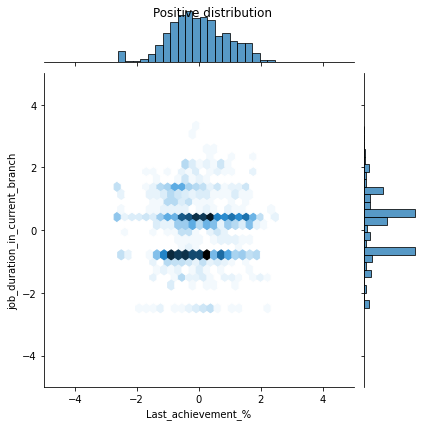

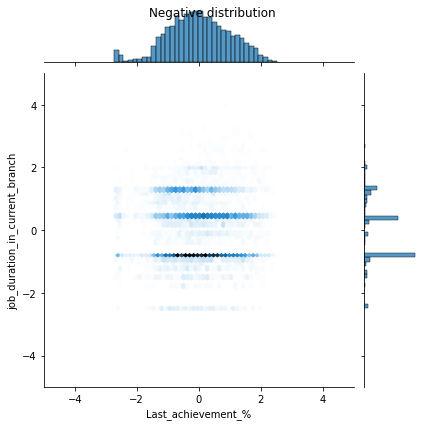

In [112]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Last_achievement_%'], pos_df['job_duration_in_current_branch'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Last_achievement_%'], neg_df['job_duration_in_current_branch'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [113]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [114]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [115]:
model = make_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                416       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.predict(train_features[:20])

array([[0.89250344],
       [0.95370156],
       [0.80210185],
       [0.72592354],
       [0.81966066],
       [0.6387087 ],
       [0.7891978 ],
       [0.66839975],
       [0.6158694 ],
       [0.93069077],
       [0.8027232 ],
       [0.8234855 ],
       [0.68694746],
       [0.7134318 ],
       [0.7948761 ],
       [0.7255465 ],
       [0.7310105 ],
       [0.6401189 ],
       [0.8389746 ],
       [0.814183  ]], dtype=float32)

In [117]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.5482


In [118]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.7600042])

In [119]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.08446217],
       [0.3428201 ],
       [0.04311851],
       [0.23026308],
       [0.26455894],
       [0.13957995],
       [0.2756211 ],
       [0.14566955],
       [0.15269083],
       [0.1781359 ]], dtype=float32)

In [120]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4614


In [121]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [122]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [123]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [124]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

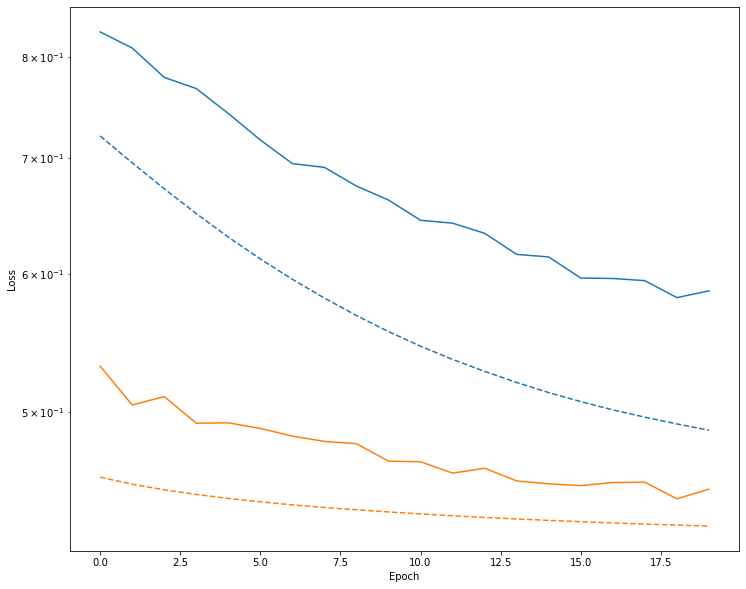

In [125]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [126]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
4/4 [==============================] - 1s 340ms/step - loss: 0.5294 - tp: 69.0000 - fp: 381.0000 - tn: 7225.0000 - fn: 1246.0000 - accuracy: 0.8176 - precision: 0.1533 - recall: 0.0525 - auc: 0.4785 - val_loss: 0.4585 - val_tp: 2.0000 - val_fp: 12.0000 - val_tn: 1515.0000 - val_fn: 256.0000 - val_accuracy: 0.8499 - val_precision: 0.1429 - val_recall: 0.0078 - val_auc: 0.4716
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5121 - tp: 55.0000 - fp: 308.0000 - tn: 5771.0000 - fn: 1002.0000 - accuracy: 0.8164 - precision: 0.1515 - recall: 0.0520 - auc: 0.4911 - val_loss: 0.4543 - val_tp: 2.0000 - val_fp: 7.0000 - val_tn: 1520.0000 - val_fn: 256.0000 - val_accuracy: 0.8527 - val_precision: 0.2222 - val_recall: 0.0078 - val_auc: 0.4701
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5107 - tp: 55.0000 - fp: 287.0000 - tn: 5792.0000 - fn: 1002.0000 - accuracy: 0.8194 - precision: 0.1608 - recall: 0.0520 - auc: 0.4936 - val_loss: 0

In [127]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

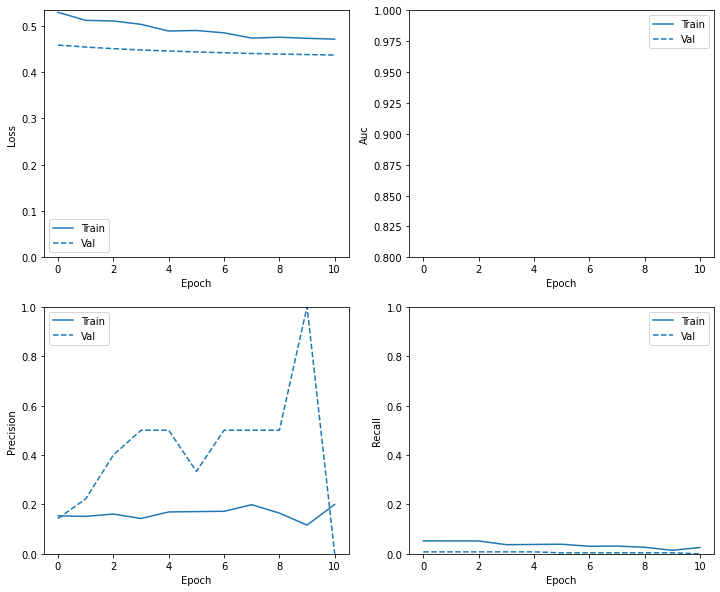

In [128]:
plot_metrics(baseline_history)

In [78]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [79]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.40290123224258423
tp :  0.0
fp :  0.0
tn :  1921.0
fn :  310.0
accuracy :  0.8610488772392273
precision :  0.0
recall :  0.0
auc :  0.5135639905929565

Legitimate Transactions Detected (True Negatives):  1921
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  310
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  310


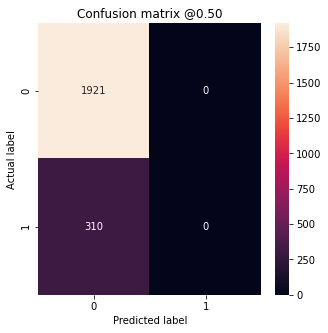

In [80]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [81]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

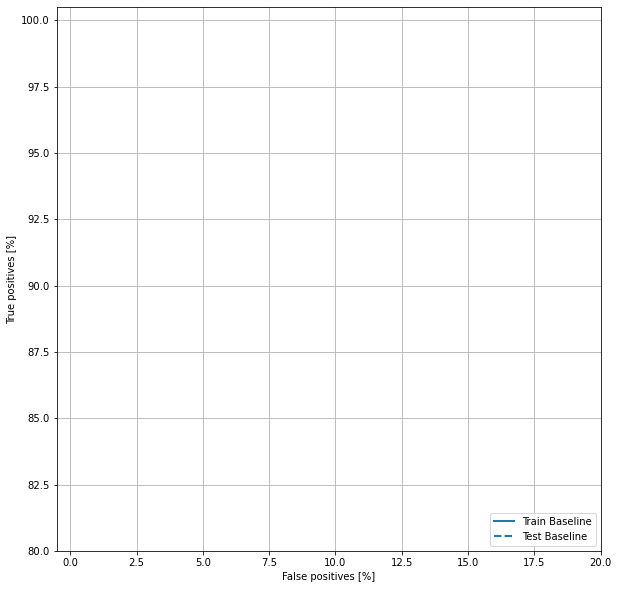

In [82]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')


In [83]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.59
Weight for class 1: 3.41


In [84]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
4/4 [==============================] - 1s 239ms/step - loss: 1.1775 - tp: 83.0000 - fp: 432.0000 - tn: 7554.0000 - fn: 1298.0000 - accuracy: 0.8153 - precision: 0.1612 - recall: 0.0601 - auc: 0.4917 - val_loss: 0.4822 - val_tp: 14.0000 - val_fp: 83.0000 - val_tn: 1446.0000 - val_fn: 242.0000 - val_accuracy: 0.8179 - val_precision: 0.1443 - val_recall: 0.0547 - val_auc: 0.4650
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1404 - tp: 79.0000 - fp: 460.0000 - tn: 5605.0000 - fn: 992.0000 - accuracy: 0.7965 - precision: 0.1466 - recall: 0.0738 - auc: 0.5016 - val_loss: 0.4794 - val_tp: 14.0000 - val_fp: 80.0000 - val_tn: 1449.0000 - val_fn: 242.0000 - val_accuracy: 0.8196 - val_precision: 0.1489 - val_recall: 0.0547 - val_auc: 0.4647
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1332 - tp: 81.0000 - fp: 487.0000 - tn: 5578.0000 - fn: 990.0000 - accuracy: 0.7930 - precision: 0.1426 - recall: 0.0756 - auc: 0.4910 - val_loss: 0

Epoch 22/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8851 - tp: 204.0000 - fp: 1181.0000 - tn: 4884.0000 - fn: 867.0000 - accuracy: 0.7130 - precision: 0.1473 - recall: 0.1905 - auc: 0.5036 - val_loss: 0.5212 - val_tp: 13.0000 - val_fp: 91.0000 - val_tn: 1438.0000 - val_fn: 243.0000 - val_accuracy: 0.8129 - val_precision: 0.1250 - val_recall: 0.0508 - val_auc: 0.4750
Epoch 23/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8854 - tp: 213.0000 - fp: 1288.0000 - tn: 4777.0000 - fn: 858.0000 - accuracy: 0.6993 - precision: 0.1419 - recall: 0.1989 - auc: 0.4976 - val_loss: 0.5258 - val_tp: 13.0000 - val_fp: 97.0000 - val_tn: 1432.0000 - val_fn: 243.0000 - val_accuracy: 0.8095 - val_precision: 0.1182 - val_recall: 0.0508 - val_auc: 0.4763
Epoch 24/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8959 - tp: 196.0000 - fp: 1254.0000 - tn: 4811.0000 - fn: 875.0000 - accuracy: 0.7017 - precision: 0.1352 - recall: 0.1830 - auc: 0.4880 - va

Epoch 43/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7979 - tp: 372.0000 - fp: 1851.0000 - tn: 4214.0000 - fn: 699.0000 - accuracy: 0.6427 - precision: 0.1673 - recall: 0.3473 - auc: 0.5223 - val_loss: 0.5851 - val_tp: 27.0000 - val_fp: 181.0000 - val_tn: 1348.0000 - val_fn: 229.0000 - val_accuracy: 0.7703 - val_precision: 0.1298 - val_recall: 0.1055 - val_auc: 0.5026
Epoch 44/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8083 - tp: 348.0000 - fp: 1875.0000 - tn: 4190.0000 - fn: 723.0000 - accuracy: 0.6359 - precision: 0.1565 - recall: 0.3249 - auc: 0.5133 - val_loss: 0.5865 - val_tp: 28.0000 - val_fp: 181.0000 - val_tn: 1348.0000 - val_fn: 228.0000 - val_accuracy: 0.7709 - val_precision: 0.1340 - val_recall: 0.1094 - val_auc: 0.5036
Epoch 45/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8153 - tp: 343.0000 - fp: 1887.0000 - tn: 4178.0000 - fn: 728.0000 - accuracy: 0.6335 - precision: 0.1538 - recall: 0.3203 - auc: 0.5039 - v

Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7753 - tp: 382.0000 - fp: 1977.0000 - tn: 4088.0000 - fn: 689.0000 - accuracy: 0.6264 - precision: 0.1619 - recall: 0.3567 - auc: 0.5192 - val_loss: 0.5996 - val_tp: 27.0000 - val_fp: 188.0000 - val_tn: 1341.0000 - val_fn: 229.0000 - val_accuracy: 0.7664 - val_precision: 0.1256 - val_recall: 0.1055 - val_auc: 0.5208
Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7869 - tp: 347.0000 - fp: 1948.0000 - tn: 4117.0000 - fn: 724.0000 - accuracy: 0.6256 - precision: 0.1512 - recall: 0.3240 - auc: 0.5097 - val_loss: 0.5996 - val_tp: 27.0000 - val_fp: 186.0000 - val_tn: 1343.0000 - val_fn: 229.0000 - val_accuracy: 0.7675 - val_precision: 0.1268 - val_recall: 0.1055 - val_auc: 0.5213
Epoch 66/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7705 - tp: 376.0000 - fp: 1951.0000 - tn: 4114.0000 - fn: 695.0000 - accuracy: 0.6292 - precision: 0.1616 - recall: 0.3511 - auc: 0.5230 - va

Epoch 85/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7691 - tp: 371.0000 - fp: 2027.0000 - tn: 4038.0000 - fn: 700.0000 - accuracy: 0.6179 - precision: 0.1547 - recall: 0.3464 - auc: 0.5109 - val_loss: 0.6077 - val_tp: 30.0000 - val_fp: 191.0000 - val_tn: 1338.0000 - val_fn: 226.0000 - val_accuracy: 0.7664 - val_precision: 0.1357 - val_recall: 0.1172 - val_auc: 0.5314
Epoch 86/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7576 - tp: 378.0000 - fp: 2040.0000 - tn: 4025.0000 - fn: 693.0000 - accuracy: 0.6170 - precision: 0.1563 - recall: 0.3529 - auc: 0.5255 - val_loss: 0.6076 - val_tp: 32.0000 - val_fp: 190.0000 - val_tn: 1339.0000 - val_fn: 224.0000 - val_accuracy: 0.7681 - val_precision: 0.1441 - val_recall: 0.1250 - val_auc: 0.5310
Epoch 87/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7581 - tp: 364.0000 - fp: 1967.0000 - tn: 4098.0000 - fn: 707.0000 - accuracy: 0.6253 - precision: 0.1562 - recall: 0.3399 - auc: 0.5237 - va

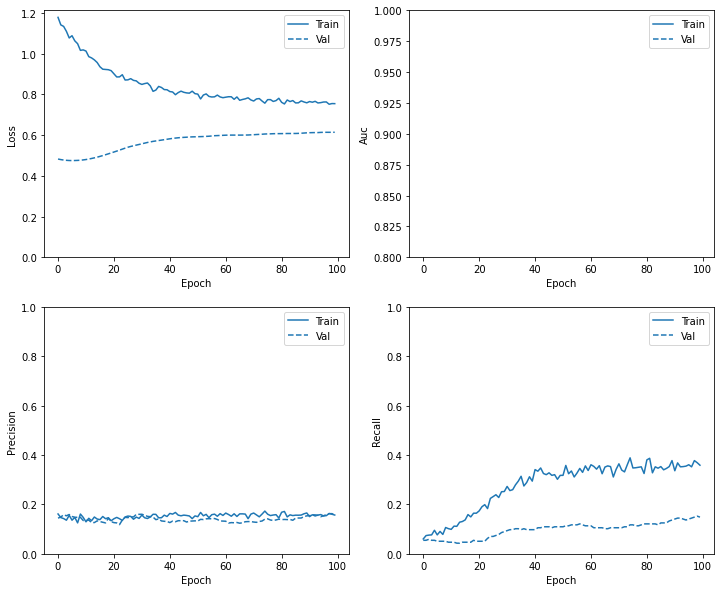

In [85]:
plot_metrics(weighted_history)

In [86]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6115642786026001
tp :  48.0
fp :  224.0
tn :  1697.0
fn :  262.0
accuracy :  0.7821604609489441
precision :  0.1764705926179886
recall :  0.1548387110233307
auc :  0.4978707432746887

Legitimate Transactions Detected (True Negatives):  1697
Legitimate Transactions Incorrectly Detected (False Positives):  224
Fraudulent Transactions Missed (False Negatives):  262
Fraudulent Transactions Detected (True Positives):  48
Total Fraudulent Transactions:  310


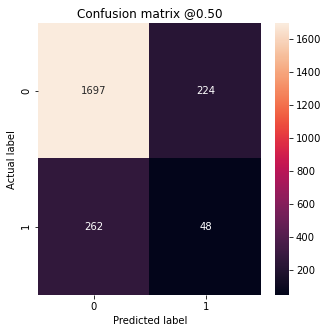

In [87]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

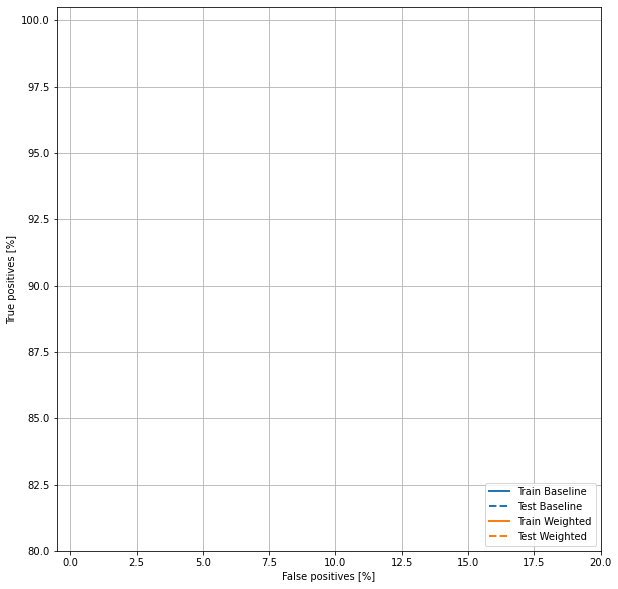

In [88]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

undersample

In [89]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [90]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(6065, 25)

In [91]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(12130, 25)

In [92]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [93]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-2.58091682e-01 -5.61042272e-01 -2.22121737e-01 -4.90972068e-01
 -8.11541368e-02  4.03452727e-01 -1.12082209e+00 -3.99838386e-01
 -9.06318613e-03  1.01673184e+00 -4.94685861e-02 -2.93922469e-01
 -2.73089164e-01  2.97935607e+00 -6.24781087e-01  6.72374316e-01
 -1.74709682e-03 -6.19448195e-01  7.30502714e-01 -6.64103852e-01
 -2.09123483e-01 -4.23449177e-01  4.23449177e-01 -6.06278635e-01
  6.06278635e-01]

Label:  1


In [94]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [95]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.50830078125


In [96]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

10.0

In [97]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
10/10 [==============================] - 1s 96ms/step - loss: 0.8590 - tp: 4699.0000 - fp: 5238.0000 - tn: 6952.0000 - fn: 5822.0000 - accuracy: 0.5130 - precision: 0.4729 - recall: 0.4466 - auc: 0.5006 - val_loss: 0.7754 - val_tp: 111.0000 - val_fp: 723.0000 - val_tn: 806.0000 - val_fn: 145.0000 - val_accuracy: 0.5137 - val_precision: 0.1331 - val_recall: 0.4336 - val_auc: 0.4618
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.8229 - tp: 4769.0000 - fp: 4892.0000 - tn: 5270.0000 - fn: 5549.0000 - accuracy: 0.4902 - precision: 0.4936 - recall: 0.4622 - auc: 0.4916 - val_loss: 0.7504 - val_tp: 110.0000 - val_fp: 703.0000 - val_tn: 826.0000 - val_fn: 146.0000 - val_accuracy: 0.5244 - val_precision: 0.1353 - val_recall: 0.4297 - val_auc: 0.4618
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.8017 - tp: 4835.0000 - fp: 5037.0000 - tn: 5269.0000 - fn: 5339.0000 - accuracy: 0.4934 - precision: 0.4898 - recall: 0.4752 - auc: 

Epoch 22/100
10/10 [==============================] - 0s 22ms/step - loss: 0.7017 - tp: 5077.0000 - fp: 4865.0000 - tn: 5451.0000 - fn: 5087.0000 - accuracy: 0.5141 - precision: 0.5107 - recall: 0.4995 - auc: 0.5228 - val_loss: 0.6907 - val_tp: 118.0000 - val_fp: 632.0000 - val_tn: 897.0000 - val_fn: 138.0000 - val_accuracy: 0.5686 - val_precision: 0.1573 - val_recall: 0.4609 - val_auc: 0.5180
Epoch 23/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6976 - tp: 5207.0000 - fp: 4653.0000 - tn: 5526.0000 - fn: 5094.0000 - accuracy: 0.5241 - precision: 0.5281 - recall: 0.5055 - auc: 0.5343 - val_loss: 0.6897 - val_tp: 116.0000 - val_fp: 628.0000 - val_tn: 901.0000 - val_fn: 140.0000 - val_accuracy: 0.5697 - val_precision: 0.1559 - val_recall: 0.4531 - val_auc: 0.5184
Epoch 24/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6992 - tp: 5131.0000 - fp: 4772.0000 - tn: 5473.0000 - fn: 5104.0000 - accuracy: 0.5178 - precision: 0.5181 - recall: 0.5013 - au

Epoch 43/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6898 - tp: 5635.0000 - fp: 4904.0000 - tn: 5278.0000 - fn: 4663.0000 - accuracy: 0.5329 - precision: 0.5347 - recall: 0.5472 - auc: 0.5493 - val_loss: 0.6869 - val_tp: 134.0000 - val_fp: 683.0000 - val_tn: 846.0000 - val_fn: 122.0000 - val_accuracy: 0.5490 - val_precision: 0.1640 - val_recall: 0.5234 - val_auc: 0.5434
Epoch 44/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6882 - tp: 5489.0000 - fp: 4926.0000 - tn: 5497.0000 - fn: 4568.0000 - accuracy: 0.5364 - precision: 0.5270 - recall: 0.5458 - auc: 0.5548 - val_loss: 0.6844 - val_tp: 130.0000 - val_fp: 667.0000 - val_tn: 862.0000 - val_fn: 126.0000 - val_accuracy: 0.5557 - val_precision: 0.1631 - val_recall: 0.5078 - val_auc: 0.5429
Epoch 45/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6892 - tp: 5417.0000 - fp: 4745.0000 - tn: 5535.0000 - fn: 4783.0000 - accuracy: 0.5348 - precision: 0.5331 - recall: 0.5311 - au

Epoch 64/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6844 - tp: 5778.0000 - fp: 4754.0000 - tn: 5586.0000 - fn: 4362.0000 - accuracy: 0.5549 - precision: 0.5486 - recall: 0.5698 - auc: 0.5736 - val_loss: 0.6811 - val_tp: 130.0000 - val_fp: 683.0000 - val_tn: 846.0000 - val_fn: 126.0000 - val_accuracy: 0.5468 - val_precision: 0.1599 - val_recall: 0.5078 - val_auc: 0.5467
Epoch 65/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6840 - tp: 5782.0000 - fp: 4625.0000 - tn: 5578.0000 - fn: 4495.0000 - accuracy: 0.5547 - precision: 0.5556 - recall: 0.5626 - auc: 0.5758 - val_loss: 0.6823 - val_tp: 132.0000 - val_fp: 692.0000 - val_tn: 837.0000 - val_fn: 124.0000 - val_accuracy: 0.5429 - val_precision: 0.1602 - val_recall: 0.5156 - val_auc: 0.5488
Epoch 00065: early stopping


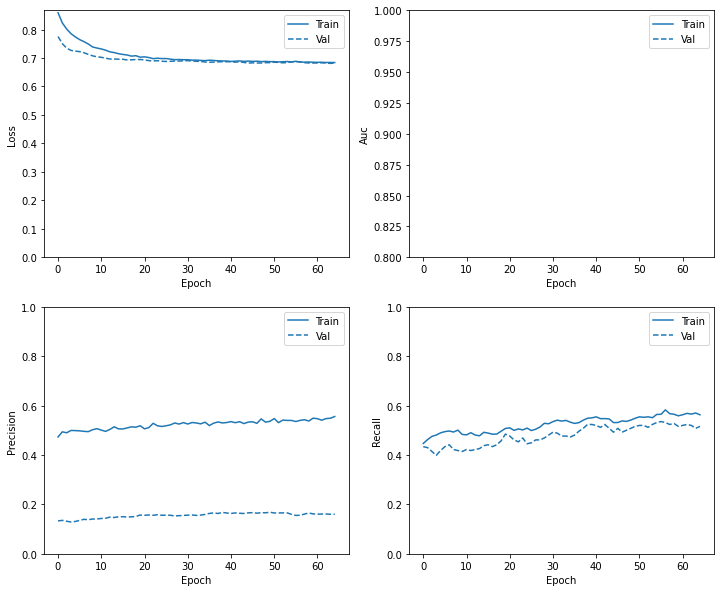

In [98]:
plot_metrics(resampled_history)

In [99]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 1s 58ms/step - loss: 0.8406 - tp: 9308.0000 - fp: 10535.0000 - tn: 11786.0000 - fn: 11116.0000 - accuracy: 0.4935 - precision: 0.4691 - recall: 0.4557 - auc: 0.4892 - val_loss: 0.7438 - val_tp: 102.0000 - val_fp: 676.0000 - val_tn: 853.0000 - val_fn: 154.0000 - val_accuracy: 0.5350 - val_precision: 0.1311 - val_recall: 0.3984 - val_auc: 0.4624
Epoch 2/1000
20/20 [==============================] - 0s 18ms/step - loss: 0.7953 - tp: 9427.0000 - fp: 9645.0000 - tn: 10838.0000 - fn: 11050.0000 - accuracy: 0.4948 - precision: 0.4943 - recall: 0.4604 - auc: 0.4928 - val_loss: 0.7210 - val_tp: 95.0000 - val_fp: 657.0000 - val_tn: 872.0000 - val_fn: 161.0000 - val_accuracy: 0.5417 - val_precision: 0.1263 - val_recall: 0.3711 - val_auc: 0.4688
Epoch 3/1000
20/20 [==============================] - 0s 20ms/step - loss: 0.7678 - tp: 9866.0000 - fp: 9981.0000 - tn: 10514.0000 - fn: 10599.0000 - accuracy: 0.4976 - precision: 0.4971 - recall: 0.482

20/20 [==============================] - 0s 19ms/step - loss: 0.6825 - tp: 12310.0000 - fp: 10011.0000 - tn: 10464.0000 - fn: 8175.0000 - accuracy: 0.5560 - precision: 0.5515 - recall: 0.6009 - auc: 0.5791 - val_loss: 0.6808 - val_tp: 140.0000 - val_fp: 711.0000 - val_tn: 818.0000 - val_fn: 116.0000 - val_accuracy: 0.5367 - val_precision: 0.1645 - val_recall: 0.5469 - val_auc: 0.5537
Epoch 42/1000
20/20 [==============================] - 0s 19ms/step - loss: 0.6817 - tp: 12145.0000 - fp: 9733.0000 - tn: 10807.0000 - fn: 8275.0000 - accuracy: 0.5604 - precision: 0.5551 - recall: 0.5948 - auc: 0.5837 - val_loss: 0.6826 - val_tp: 141.0000 - val_fp: 721.0000 - val_tn: 808.0000 - val_fn: 115.0000 - val_accuracy: 0.5317 - val_precision: 0.1636 - val_recall: 0.5508 - val_auc: 0.5530
Epoch 43/1000
20/20 [==============================] - 0s 19ms/step - loss: 0.6819 - tp: 12324.0000 - fp: 9881.0000 - tn: 10553.0000 - fn: 8202.0000 - accuracy: 0.5585 - precision: 0.5550 - recall: 0.6004 - auc: 0

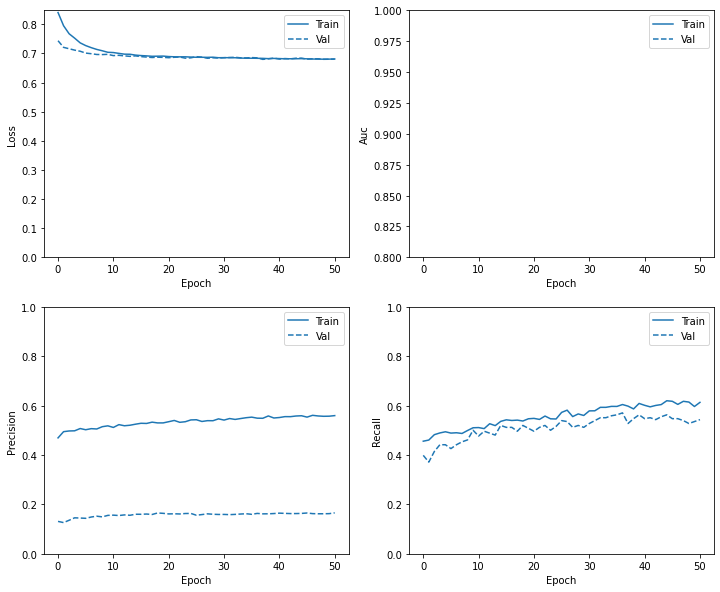

In [100]:
plot_metrics(resampled_history)

In [101]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6810214519500732
tp :  151.0
fp :  865.0
tn :  1056.0
fn :  159.0
accuracy :  0.5410130023956299
precision :  0.1486220508813858
recall :  0.48709678649902344
auc :  0.5229282379150391

Legitimate Transactions Detected (True Negatives):  1056
Legitimate Transactions Incorrectly Detected (False Positives):  865
Fraudulent Transactions Missed (False Negatives):  159
Fraudulent Transactions Detected (True Positives):  151
Total Fraudulent Transactions:  310


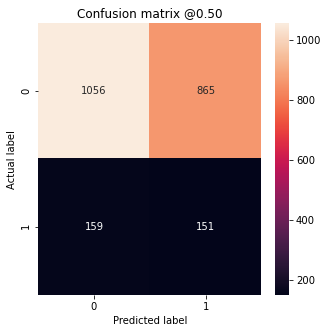

In [102]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)


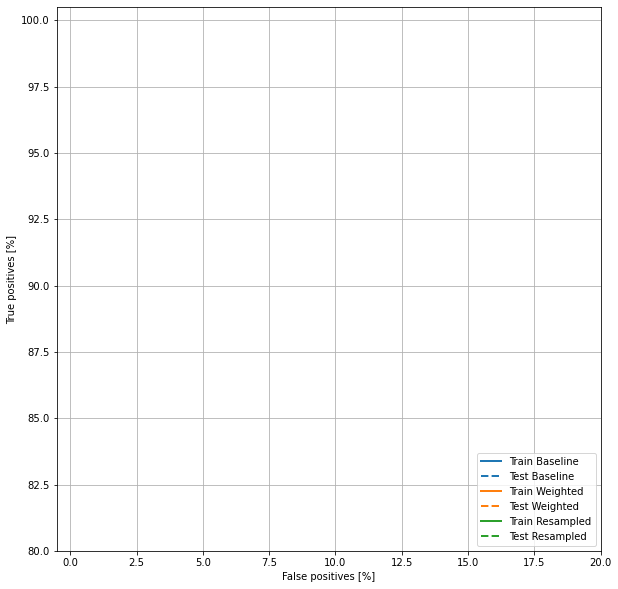

In [103]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

Random Forrest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()
rf3 = RandomForestClassifier()
rf4 = RandomForestClassifier()
rf5 = RandomForestClassifier()
rf6 = RandomForestClassifier()
rf7 = RandomForestClassifier()
rf8 = RandomForestClassifier()
rf9 = RandomForestClassifier()
rf10 = RandomForestClassifier()
rf1.fit(x_rus,y_rus)
rf2.fit(x_ros,y_ros)
rf3.fit(x_smote,y_smote)
rf4.fit(x_nm,y_nm)
rf5.fit(x_tl,y_tl)
rf6.fit(X_bsmt,y_bsmt)
rf7.fit(X_oversample_ada,y_oversample_ada)
rf8.fit(X_smt,y_smt)
rf9.fit(X_oversample_svm,y_oversample_svm)
rf10.fit(X_cc,y_cc)
y_proba1=rf1.predict_proba(X_test)
y_proba2=rf2.predict_proba(X_test)
y_proba3=rf3.predict_proba(X_test)
y_proba4=rf4.predict_proba(X_test)
y_proba5=rf5.predict_proba(X_test)
y_proba6=rf6.predict_proba(X_test)
y_proba7=rf7.predict_proba(X_test)
y_proba8=rf8.predict_proba(X_test)
y_proba9=rf9.predict_proba(X_test)
y_proba10=rf10.predict_proba(X_test)

No Skill: ROC AUC=0.500
Random Undersampling: ROC AUC=0.527
Random Oversampling: ROC AUC=0.545
SMOTE: ROC AUC=0.532
nm: ROC AUC=0.517
tl: ROC AUC=0.540
bsmt: ROC AUC=0.530
oversample_ada: ROC AUC=0.520
smt: ROC AUC=0.519
oversample_svm: ROC AUC=0.527
cc: ROC AUC=0.477


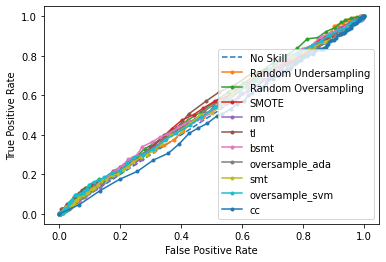

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs1 = y_proba1[:, 1]
lr_probs2 = y_proba2[:, 1]
lr_probs3 = y_proba3[:, 1]
lr_probs4 = y_proba4[:, 1]
lr_probs5 = y_proba5[:, 1]
lr_probs6 = y_proba6[:, 1]
lr_probs7 = y_proba7[:, 1]
lr_probs8 = y_proba8[:, 1]
lr_probs9 = y_proba9[:, 1]
lr_probs10 = y_proba10[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)
lr_auc4 = roc_auc_score(y_test, lr_probs4)
lr_auc5 = roc_auc_score(y_test, lr_probs5)
lr_auc6 = roc_auc_score(y_test, lr_probs6)
lr_auc7 = roc_auc_score(y_test, lr_probs7)
lr_auc8 = roc_auc_score(y_test, lr_probs8)
lr_auc9 = roc_auc_score(y_test, lr_probs9)
lr_auc10 = roc_auc_score(y_test, lr_probs10)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Undersampling: ROC AUC=%.3f' % (lr_auc1))
print('Random Oversampling: ROC AUC=%.3f' % (lr_auc2))
print('SMOTE: ROC AUC=%.3f' % (lr_auc3))
print('nm: ROC AUC=%.3f' % (lr_auc4))
print('tl: ROC AUC=%.3f' % (lr_auc5))
print('bsmt: ROC AUC=%.3f' % (lr_auc6))
print('oversample_ada: ROC AUC=%.3f' % (lr_auc7))
print('smt: ROC AUC=%.3f' % (lr_auc8))
print('oversample_svm: ROC AUC=%.3f' % (lr_auc9))
print('cc: ROC AUC=%.3f' % (lr_auc10))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(y_test, lr_probs4)
lr_fpr5, lr_tpr5, _ = roc_curve(y_test, lr_probs5)
lr_fpr6, lr_tpr6, _ = roc_curve(y_test, lr_probs6)
lr_fpr7, lr_tpr7, _ = roc_curve(y_test, lr_probs7)
lr_fpr8, lr_tpr8, _ = roc_curve(y_test, lr_probs8)
lr_fpr9, lr_tpr9, _ = roc_curve(y_test, lr_probs9)
lr_fpr10, lr_tpr10, _ = roc_curve(y_test, lr_probs10)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Random Undersampling')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='Random Oversampling')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='SMOTE')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='nm')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', label='tl')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', label='bsmt')
pyplot.plot(lr_fpr7, lr_tpr7, marker='.', label='oversample_ada')
pyplot.plot(lr_fpr8, lr_tpr8, marker='.', label='smt')
pyplot.plot(lr_fpr9, lr_tpr9, marker='.', label='oversample_svm')
pyplot.plot(lr_fpr10, lr_tpr10, marker='.', label='cc')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGboost

In [43]:
from xgboost import XGBClassifier
xg1 = XGBClassifier()
xg2 = XGBClassifier()
xg3 = XGBClassifier()
xg4 = XGBClassifier()
xg5 = XGBClassifier()
xg6 = XGBClassifier()
xg7 = XGBClassifier()
xg8 = XGBClassifier()
xg9 = XGBClassifier()
xg10 = XGBClassifier()
xg1.fit(x_rus,y_rus)
xg2.fit(x_ros,y_ros)
xg3.fit(x_smote,y_smote)
xg4.fit(x_nm,y_nm)
xg5.fit(x_tl,y_tl)
xg6.fit(X_bsmt,y_bsmt)
xg7.fit(X_oversample_ada,y_oversample_ada)
xg8.fit(X_smt,y_smt)
xg9.fit(X_oversample_svm,y_oversample_svm)
xg10.fit(X_cc,y_cc)
y_proba1=xg1.predict_proba(X_test)
y_proba2=xg2.predict_proba(X_test)
y_proba3=xg3.predict_proba(X_test)
y_proba4=xg4.predict_proba(X_test)
y_proba5=xg5.predict_proba(X_test)
y_proba6=xg6.predict_proba(X_test)
y_proba7=xg7.predict_proba(X_test)
y_proba8=xg8.predict_proba(X_test)
y_proba9=xg9.predict_proba(X_test)
y_proba10=xg10.predict_proba(X_test)

C:\Users\USER\anaconda3\envs\tensorgpu\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

No Skill: ROC AUC=0.500
Random Undersampling: ROC AUC=0.548
Random Oversampling: ROC AUC=0.509
SMOTE: ROC AUC=0.529
nm: ROC AUC=0.518
tl: ROC AUC=0.518
bsmt: ROC AUC=0.506
oversample_ada: ROC AUC=0.508
smt: ROC AUC=0.521
oversample_svm: ROC AUC=0.532
cc: ROC AUC=0.487


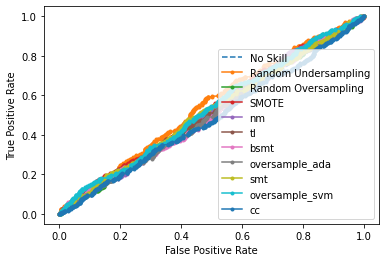

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs1 = y_proba1[:, 1]
lr_probs2 = y_proba2[:, 1]
lr_probs3 = y_proba3[:, 1]
lr_probs4 = y_proba4[:, 1]
lr_probs5 = y_proba5[:, 1]
lr_probs6 = y_proba6[:, 1]
lr_probs7 = y_proba7[:, 1]
lr_probs8 = y_proba8[:, 1]
lr_probs9 = y_proba9[:, 1]
lr_probs10 = y_proba10[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)
lr_auc4 = roc_auc_score(y_test, lr_probs4)
lr_auc5 = roc_auc_score(y_test, lr_probs5)
lr_auc6 = roc_auc_score(y_test, lr_probs6)
lr_auc7 = roc_auc_score(y_test, lr_probs7)
lr_auc8 = roc_auc_score(y_test, lr_probs8)
lr_auc9 = roc_auc_score(y_test, lr_probs9)
lr_auc10 = roc_auc_score(y_test, lr_probs10)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Undersampling: ROC AUC=%.3f' % (lr_auc1))
print('Random Oversampling: ROC AUC=%.3f' % (lr_auc2))
print('SMOTE: ROC AUC=%.3f' % (lr_auc3))
print('nm: ROC AUC=%.3f' % (lr_auc4))
print('tl: ROC AUC=%.3f' % (lr_auc5))
print('bsmt: ROC AUC=%.3f' % (lr_auc6))
print('oversample_ada: ROC AUC=%.3f' % (lr_auc7))
print('smt: ROC AUC=%.3f' % (lr_auc8))
print('oversample_svm: ROC AUC=%.3f' % (lr_auc9))
print('cc: ROC AUC=%.3f' % (lr_auc10))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(y_test, lr_probs4)
lr_fpr5, lr_tpr5, _ = roc_curve(y_test, lr_probs5)
lr_fpr6, lr_tpr6, _ = roc_curve(y_test, lr_probs6)
lr_fpr7, lr_tpr7, _ = roc_curve(y_test, lr_probs7)
lr_fpr8, lr_tpr8, _ = roc_curve(y_test, lr_probs8)
lr_fpr9, lr_tpr9, _ = roc_curve(y_test, lr_probs9)
lr_fpr10, lr_tpr10, _ = roc_curve(y_test, lr_probs10)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Random Undersampling')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='Random Oversampling')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='SMOTE')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='nm')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', label='tl')
pyplot.plot(lr_fpr6, lr_tpr6, marker='.', label='bsmt')
pyplot.plot(lr_fpr7, lr_tpr7, marker='.', label='oversample_ada')
pyplot.plot(lr_fpr8, lr_tpr8, marker='.', label='smt')
pyplot.plot(lr_fpr9, lr_tpr9, marker='.', label='oversample_svm')
pyplot.plot(lr_fpr10, lr_tpr10, marker='.', label='cc')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Hyperparamater tunning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
rf = RandomForestClassifier()

In [70]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],

    'max_depth': [100,120,130],
    'max_features': [1,2,3],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [8,10, 12],
    'n_estimators': [1000,1200,1500]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [71]:
best=grid_search.fit(x_tl,y_tl)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed: 21.4min finished


In [254]:
best.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 1500}

In [170]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],

    'max_depth': [20,50,100],
    'max_features': [1,2,3],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [2,4,8],
    'n_estimators': [250,500,1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [171]:
best=grid_search.fit(x_tl,y_tl)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed: 16.9min finished


In [172]:
best.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [72]:
rf = RandomForestClassifier(bootstrap=True,
                           max_depth=100,
                           max_features=2,
                           min_samples_leaf=2,
                           min_samples_split=2,
                           n_estimators=500)
rf.fit(x_tl,y_tl)
y_proba=rf.predict_proba(X_test)

No Skill: ROC AUC=0.500
Hyper Model : ROC AUC=0.569


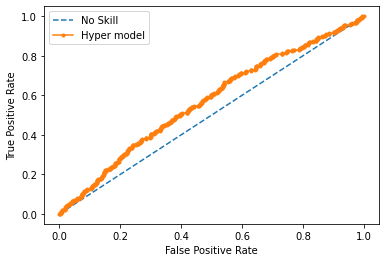

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = y_proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Hyper Model : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Hyper model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()